# Setting Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import ast
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import GridSearchCV

In [2]:
df_tweets = pd.read_csv('./cv_tweets.csv')
df_tweets.head()

,sentimen,0,1,2,3,4,5,6,7,8,...,4478,4479,4480,4481,4482,4483,4484,4485,4486,4487
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Fiture Selection

In [3]:
X = df_tweets.iloc[:,1:]
y = df_tweets.sentimen

# Data Modeling

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10) 

In [5]:
X_train, X_test

(      0  1  2  3  4  5  6  7  8  9  ...  4478  4479  4480  4481  4482  4483  \
 2331  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 2558  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 1234  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 1804  0  0  0  0  0  0  0  0  0  1  ...     0     0     0     0     0     0   
 2165  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 ...  .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
 3441  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 1344  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 527   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 3197  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 1289  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 
       4484  4485  4486  4487  
 2331 

In [6]:

scores = ['precision', 'recall']

def run_tuning(model, hyperparameters, scores, X_train, y_train, X_test, y_test):
    for score in scores:
        print("Tuning hyperparameter for %s" % score)
        print()

        clf = GridSearchCV(model, hyperparameters, scoring='%s_macro' % score, cv=None, n_jobs=-1)
        clf.fit(X_train, y_train)

        print('Best parameter set found: ')
        print()
        print(clf.best_params_)
        print()

        print('Grid scores in process: ')
        print()
        means = clf.cv_results_['mean_test_score']

        for mean, params in zip(means, clf.cv_results_['params']):
            print('%0.3f for %r' % (mean, params))

        print()
        print()
        print('Detail Classification Report')
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        print()
     

In [7]:

hyperparameters = {
    'bootstrap': [True],
    'max_depth': [10, 100],
    'max_features': [2, 3, 'auto'],
    'n_estimators': [10, 100, 200]}

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2901, 4488)
(726, 4488)
(2901,)
(726,)


In [9]:
rfc = RandomForestClassifier(n_jobs=-1)
run_tuning(rfc, hyperparameters, scores, X_train, y_train, X_test, y_test)

Tuning hyperparameter for precision



Best parameter set found: 

{'bootstrap': True, 'max_depth': 100, 'max_features': 2, 'n_estimators': 200}

Grid scores in process: 

0.528 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'n_estimators': 10}
0.657 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'n_estimators': 100}
0.710 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'n_estimators': 200}
0.535 for {'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'n_estimators': 10}
0.659 for {'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'n_estimators': 100}
0.704 for {'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'n_estimators': 200}
0.565 for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 10}
0.649 for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}
0.653 for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
0.682 for {'bootstrap': True, 'max_depth': 100, 'max_features': 2, 'n_es

In [10]:
rf = RandomForestClassifier(max_depth=100, max_features='auto', bootstrap=True, n_estimators=100 )
rf.fit(X_train, y_train)

c:\Users\ariza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=100, max_features='auto')

In [11]:
y_pred = rf.predict(X_test)

In [12]:
len(y_pred), len(y_test), y_train

(726,
 726,
 2331    1
 2558    2
 1234    1
 1804    2
 2165    0
        ..
 3441    1
 1344    2
 527     1
 3197    0
 1289    1
 Name: sentimen, Length: 2901, dtype: int64)

# Evaluate

## Confusion matrix

In [13]:
# buat confusion matrix antara Test dan Prediksi
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2
Actual,,,
0,203,26,3
1,13,216,12
2,11,27,215


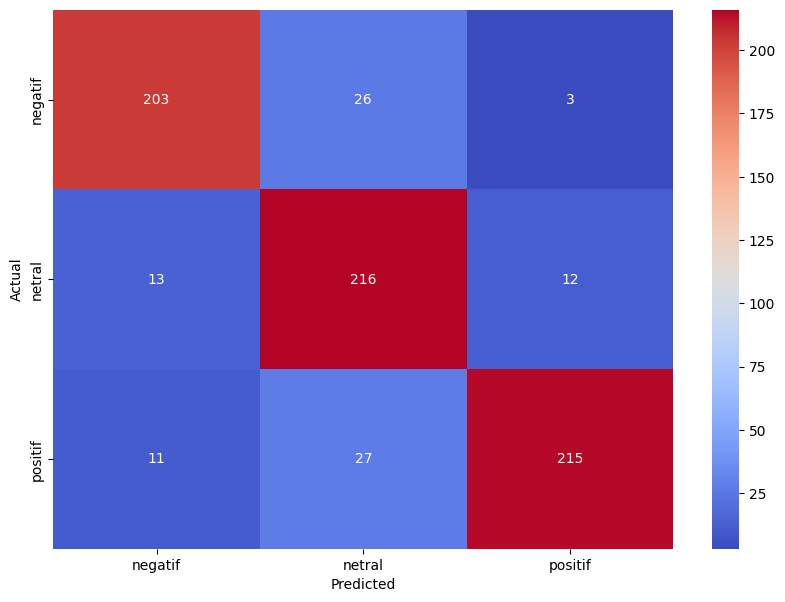

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Accuracy, Recall, Precision, F1 Score

In [15]:
report = classification_report(y_test, y_pred)
print(report)

# Hitung dan cetak accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       232
           1       0.80      0.90      0.85       241
           2       0.93      0.85      0.89       253

    accuracy                           0.87       726
   macro avg       0.88      0.87      0.87       726
weighted avg       0.88      0.87      0.87       726

Accuracy: 0.8732782369146006
